<a href="https://colab.research.google.com/github/venkatasnehith/Time-series-forecasting/blob/main/time_seris_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Step 1: Import necessary libraries
import pandas as pd
import kagglehub
import os

# Step 2: Download dataset from KaggleHub
path = kagglehub.dataset_download("jacksoncrow/stock-market-dataset")
print("Path to dataset files:", path)

# Step 3: Load a CSV file (e.g., AAPL.csv) from the dataset
csv_file = os.path.join(path, 'stocks', 'AAPL.csv')  # You can change 'AAPL.csv' to other stock symbols
df = pd.read_csv(csv_file)
print("Initial DataFrame:\n", df.head())
print("Columns:", df.columns.tolist())


Path to dataset files: /kaggle/input/stock-market-dataset
Initial DataFrame:
          Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.513393  0.515625  0.513393  0.513393   0.406782  117258400
1  1980-12-15  0.488839  0.488839  0.486607  0.486607   0.385558   43971200
2  1980-12-16  0.453125  0.453125  0.450893  0.450893   0.357260   26432000
3  1980-12-17  0.462054  0.464286  0.462054  0.462054   0.366103   21610400
4  1980-12-18  0.475446  0.477679  0.475446  0.475446   0.376715   18362400
Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [55]:
# Step 4: Convert 'Date' to datetime format and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 5: Select only the 'Close' price for forecasting
df = df[['Close']]
df.dropna(inplace=True)

# Step 6: Display final DataFrame
print("Cleaned Data:\n", df.head())
print("Data types:\n", df.dtypes)
print("Shape:", df.shape)


Cleaned Data:
                Close
Date                
1980-12-12  0.513393
1980-12-15  0.486607
1980-12-16  0.450893
1980-12-17  0.462054
1980-12-18  0.475446
Data types:
 Close    float64
dtype: object
Shape: (9909, 1)


/tmp/ipython-input-55-1212757146.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [56]:
!pip install kagglehub
!pip install pandas numpy matplotlib statsmodels --quiet


In [57]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("jacksoncrow/stock-market-dataset")
print("Dataset downloaded to:", path)


Dataset downloaded to: /kaggle/input/stock-market-dataset


In [58]:
import pandas as pd
import os

# Load a specific stock file (e.g., Apple)
file_path = os.path.join(path, "stocks", "AAPL.csv")
df = pd.read_csv(file_path)

# Display columns to verify
print(df.columns.tolist())
df.head()


['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [59]:
# Convert 'Date' column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Keep only the 'Close' column
df = df[['Close']].copy()
df.dropna(inplace=True)
df.head()


,Close
Date,
1980-12-12,0.513393
1980-12-15,0.486607
1980-12-16,0.450893
1980-12-17,0.462054
1980-12-18,0.475446


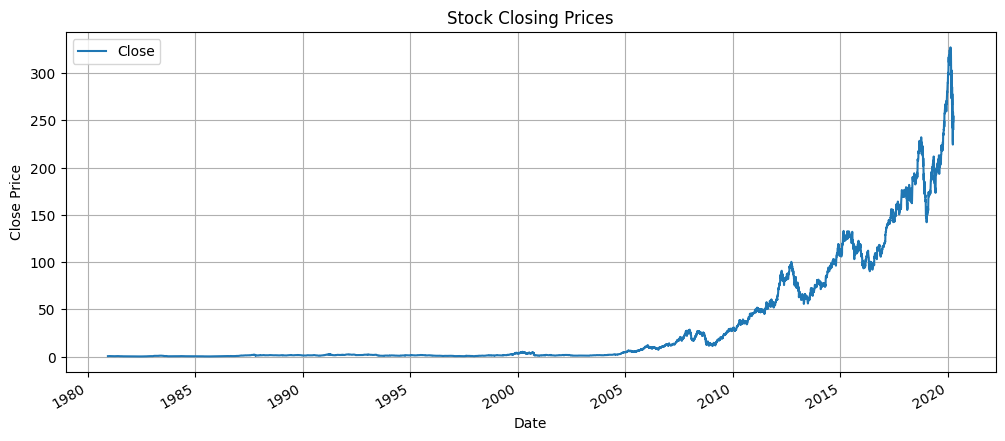

In [60]:
import matplotlib.pyplot as plt

df.plot(figsize=(12, 5), title="Stock Closing Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

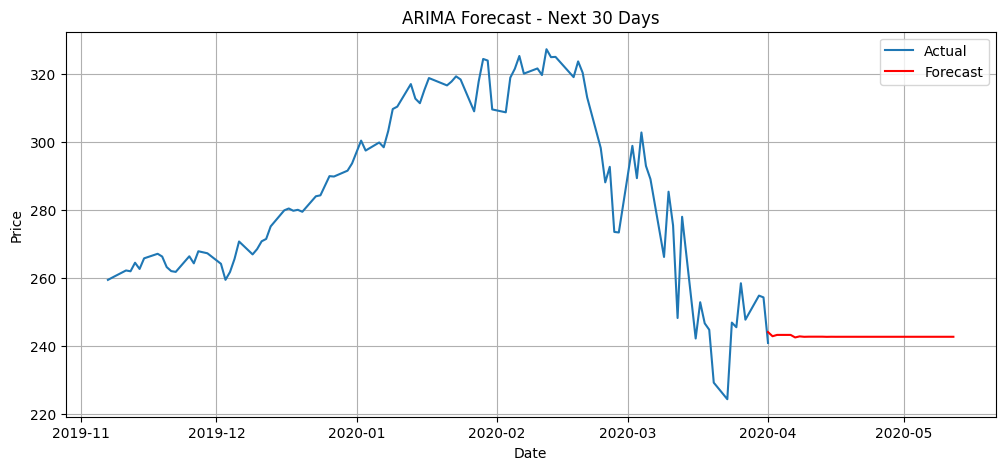

In [61]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Fit ARIMA model (simple ARIMA(5,1,0))
model = ARIMA(df['Close'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)

# Plot forecast
plt.figure(figsize=(12, 5))
plt.plot(df.index[-100:], df['Close'].tail(100), label="Actual")
plt.plot(pd.date_range(df.index[-1], periods=30, freq='B'), forecast, label="Forecast", color="red")
plt.title("ARIMA Forecast - Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


LSTM

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

import os


In [65]:
# ✅ Step 1: Import required libraries
import kagglehub
import os
import pandas as pd

# ✅ Step 2: Download dataset from KaggleHub
path = kagglehub.dataset_download("jacksoncrow/stock-market-dataset")
print("Path to dataset files:", path)

# ✅ Step 3: Construct correct CSV file path for Apple stock
csv_path = os.path.join(path, "stocks", "AAPL.csv")  # Correct location is inside 'stocks' folder

# ✅ Step 4: Load the dataset
df = pd.read_csv(csv_path)
df.head()  # Show the first 5 rows


Path to dataset files: /kaggle/input/stock-market-dataset


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [66]:
# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Keep only 'Close' column
df = df[['Close']]
df.dropna(inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

scaled_data[:5]  # Show first few normalized values


/tmp/ipython-input-66-3964027188.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


array([[0.0009693 ],
       [0.00088739],
       [0.00077817],
       [0.0008123 ],
       [0.00085326]])

In [67]:
# Use last 60 days to predict next day
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape to [samples, time steps, features] for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)


In [68]:
train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [69]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=1)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 5.2237e-04 - val_loss: 7.8514e-04
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 6.5640e-06 - val_loss: 6.3458e-04
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 7.0340e-06 - val_loss: 5.8452e-04
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 7.8756e-06 - val_loss: 4.0383e-04
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 5.8692e-06 - val_loss: 3.6349e-04
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 5.3769e-06 - val_loss: 3.1604e-04
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 5.7243e-06 - val_loss: 7.3966e-04
Epoch 8/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - loss: 5.1733e-06 - val_loss: 3.4469e-04
Epoch 9/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 4.4861e-06 - val_loss: 6.8092e-04
Epoch 10/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 5.7667e-06 - val_loss: 2.4398e-04


In [70]:
# Predict
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


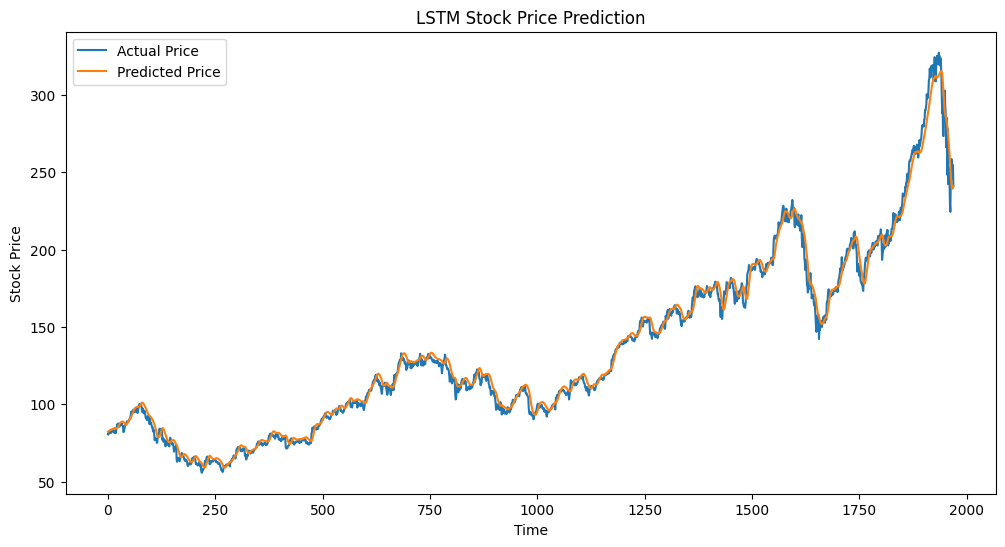

In [71]:
# Plot test predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(test_predict, label='Predicted Price')
plt.title('LSTM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

import os


In [73]:
# ✅ Step 1: Import required libraries
import kagglehub
import os
import pandas as pd

# ✅ Step 2: Download dataset from KaggleHub
path = kagglehub.dataset_download("jacksoncrow/stock-market-dataset")
print("Path to dataset files:", path)

# ✅ Step 3: Construct correct CSV file path for Apple stock
csv_path = os.path.join(path, "stocks", "MSFT.csv")  # Correct location is inside 'stocks' folder

# ✅ Step 4: Load the dataset
df = pd.read_csv(csv_path)
df.head()  # Show the first 5 rows


Path to dataset files: /kaggle/input/stock-market-dataset


,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101562,0.088542,0.097222,0.062378,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064606,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065720,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064049,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062935,47894400


In [74]:
# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Keep only 'Close' column
df = df[['Close']]
df.dropna(inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

scaled_data[:5]  # Show first few normalized values


/tmp/ipython-input-74-3964027188.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


array([[3.68191405e-05],
       [5.52287108e-05],
       [6.44334564e-05],
       [5.06262985e-05],
       [4.14215133e-05]])

In [75]:
# Use last 60 days to predict next day
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape to [samples, time steps, features] for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)


In [76]:
train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [77]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=1)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0021 - val_loss: 7.2853e-04
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 3.9515e-05 - val_loss: 0.0012
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 3.8410e-05 - val_loss: 8.0907e-04
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 3.9160e-05 - val_loss: 0.0013
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 3.3281e-05 - val_loss: 9.4274e-04
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 3.8437e-05 - val_loss: 0.0013
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 3.0503e-05 - val_loss: 0.0013
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 2.8685e-05 - val_loss: 0.0013
Epoch 9/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 2.7287e-05 - val_loss: 0.0012
Epoch 10/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 2.6307e-05 - val_loss: 0.0013


In [78]:
# Predict
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


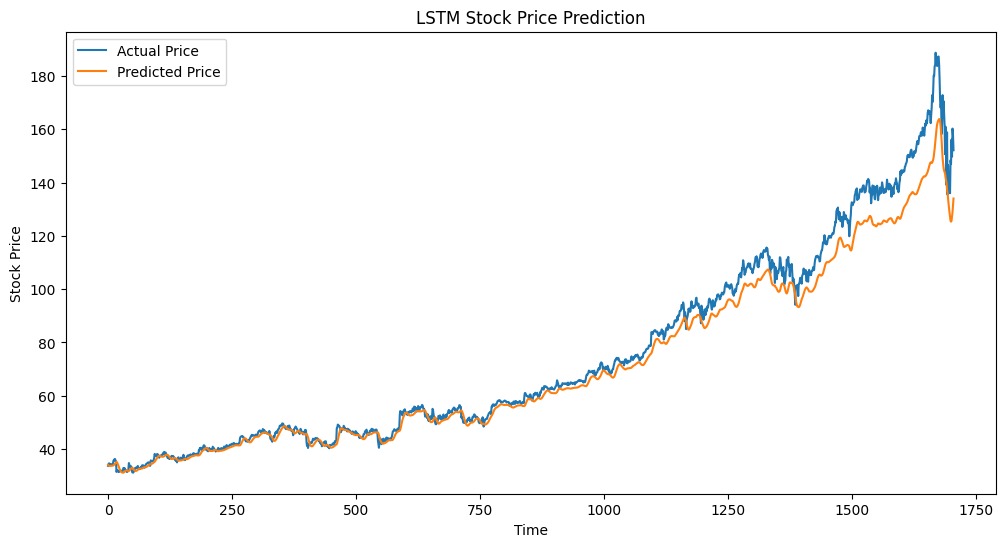

In [80]:
# Plot test predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(test_predict, label='Predicted Price')
plt.title('LSTM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
